# Statistical Analysis | EDA -  Dataset

In [1]:
# Libraries Needed:
import pandas as pd
import seaborn as sns
from scipy import stats


# Extra Lib to ingnore some warnings: 
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/home/omkar/Omkar Pawar/Data Science/Exploratory Data Analysis/Assets/Raw Data Sets/winequality-red.csv'

df = pd.read_csv(path, sep=';') # by default values sep= ',' | CSV = comma separated values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['volatile acidity']

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

<Axes: xlabel='volatile acidity', ylabel='Density'>

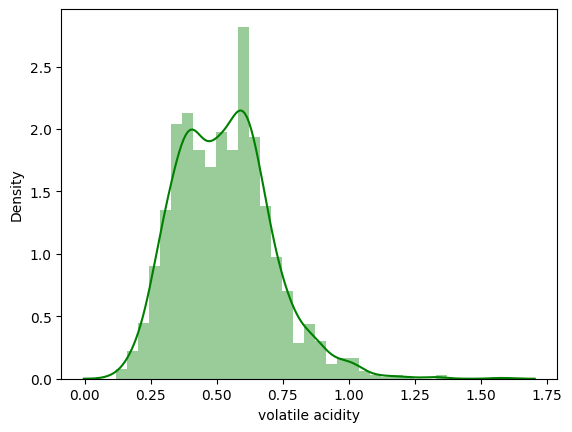

In [4]:
sns.distplot(df['volatile acidity'], kde=True, color= 'green')

<Axes: xlabel='citric acid', ylabel='Density'>

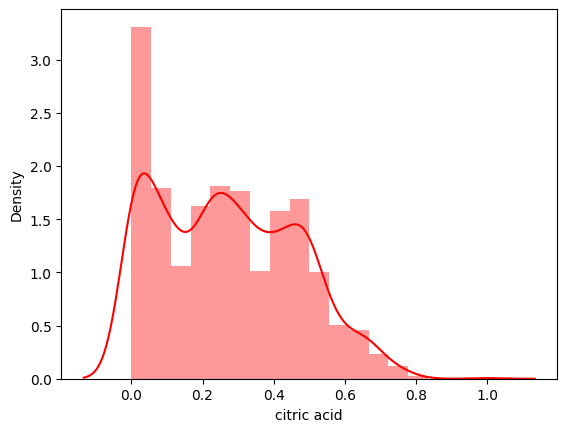

In [5]:
sns.distplot(df['citric acid'], color='red')

### Shapiro Wilk Test:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.

in short if `pvalue > 0.05` then we fail to reject null hypothesis.

means we accept the null hypothesis.

Hence Distribution is normal with `pvalue > 0.05`

In [6]:
stats.shapiro(df['volatile acidity']) # Normal Distribution

ShapiroResult(statistic=0.9743338823318481, pvalue=2.686385373947307e-16)

In [7]:
stats.shapiro(df['citric acid'])

ShapiroResult(statistic=0.955294668674469, pvalue=1.0233944777578548e-21)

In [8]:
# Creating normally distributed data:

from numpy.random import randn

normal_dist = randn(500)
normal_dist

array([-5.27841903e-01, -1.08422370e+00, -7.45767675e-01, -9.73723446e-01,
        2.65914244e-01, -1.17972979e+00,  2.49668196e-01, -5.75461683e-01,
        4.50739613e-01,  5.62725371e-02,  8.23460616e-01,  1.65117133e-01,
       -2.01016129e+00, -4.59019324e-01, -6.98821608e-01, -6.24161431e-01,
       -7.11492049e-01,  1.20440926e-01,  6.49216620e-01,  7.03088548e-01,
       -7.66149945e-01,  1.25359514e+00, -1.15616308e+00,  7.85865602e-02,
       -1.40783584e+00,  4.37629931e-01, -1.07915309e+00, -8.44546289e-01,
        1.91851366e-01, -9.00228266e-01, -1.15607533e+00, -1.07385381e+00,
        1.25709132e-02, -1.18418190e+00,  1.29526081e+00,  1.37821526e+00,
       -1.32280763e+00,  2.06447915e+00, -4.04754075e-01,  1.23020823e+00,
       -1.33610674e+00, -1.56416849e+00,  1.40023760e+00,  1.28161903e+00,
        5.72054835e-01, -5.82060017e-01, -2.38038541e-01,  1.54296576e+00,
       -1.20784221e+00, -2.99853257e-01, -8.36745957e-02,  6.13713658e-01,
        1.04974157e-01, -

<Axes: ylabel='Density'>

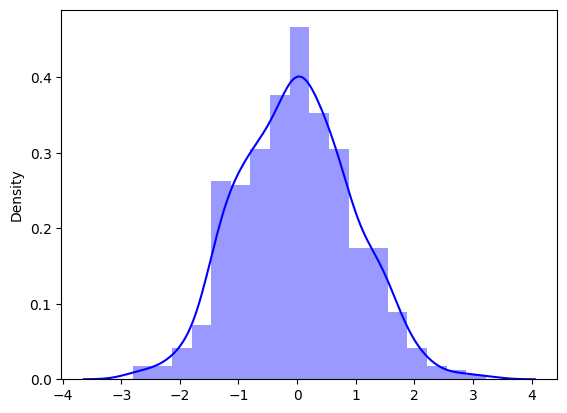

In [9]:
sns.distplot(normal_dist, color='blue')

In [10]:
stats.shapiro(normal_dist)

ShapiroResult(statistic=0.9973682165145874, pvalue=0.6151639819145203)

In [11]:
# creating a function to tell if our data is normally distributed or not:

# Null Hypothesis: the data was drawn from a normal distribution.
# Alternate Hypothesis: the data was not drawn from a normal distribution.

import numpy as np
import scipy.stats as stats
alpha = 0.05 # alpha - significance level 

def is_normal(data):
    if stats.shapiro(data).pvalue > alpha:
        print(f'We fail to reject the null hypothesis, Hence your dataset is normally distributed')
    else:
        print(f'We reject the null hypothesis, Hence your dataset is not normally distributed')


In [12]:
is_normal(normal_dist)

We fail to reject the null hypothesis, Hence your dataset is normally distributed


In [13]:
is_normal(df['volatile acidity'])

We reject the null hypothesis, Hence your dataset is not normally distributed


In [14]:
is_normal(df['citric acid'])

We reject the null hypothesis, Hence your dataset is not normally distributed


* Note: [Using Shapiro test might not be an Ideal thing to do every time!](https://towardsdatascience.com/stop-testing-for-normality-dba96bb73f90)